# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

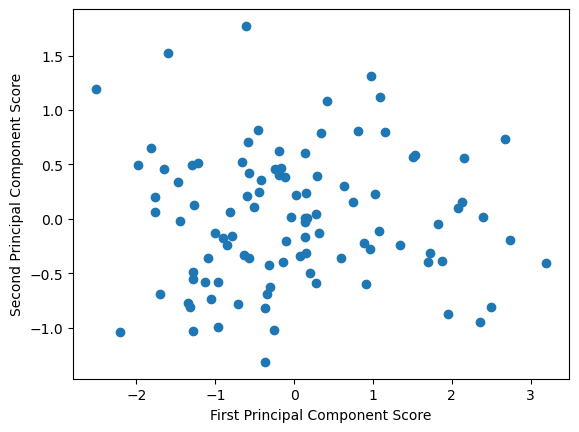

In [43]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

* What can be said about the three outliers in the upper left corner? 

    In a PCA scatter plot, the x-axis represents the first principal component score, and the y-axis represents the second principal component score. So, the three outliers in the upper left corner have low scores on the first principal component (because they are positioned far to the left) and high scores on the second principal component (because they are located high up on the plot).
* What does that mean about their values in series_1, series_2, and series_3? 

    Series_1 and series_2 are strongly positively correlated. series_3 is also positively correlated with series_1, but with more variation due to the higher noise level.
* So, why can we say more about series_3 than about series_1 or series_2? 

    PC1 captures shared variance of correlated series_1 and series_2. PC2 likely captures the larger noise in series_3. High PC2 scores suggest unusual series_3 values, independent of series_1/series_2. Thus, outliers with high PC2 likely have unusual series_3 values. We can't infer series_1 or series_2 values from high PC2 alone, nor their relative values due to their strong correlation and primary influence on PC1.
* Advantage and Disadvantage of PCA scatter plot 

    The PCA scatter plot is useful because it reduces three-dimensional data to two dimensions for easier visualization. It helps reveal patterns, such as structure, clusters, or outliers, and highlights directions of maximum variance in the data. However, interpreting the plot can be challenging, as the component scores are combinations of the original variables, making it hard to relate them directly back to the raw data. Additionally, PCA is sensitive to scaling and outliers.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [20]:
#Load dataset
# I am using an already processed dataset from Week 6
#df = pd.read_csv("FraminghamHeartStudy_ProcessedData.csv")
df = pd.read_csv("/Users/vipul/Documents/pallavi_documents/courses/BU-MS Data Science/Mod B 02 AI/Weekly Notebooks/FraminghamHeartStudy_ProcessedData.csv")
#Summarize the datasets using info() and describe()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RANDID      11627 non-null  int64  
 1   SEX         11627 non-null  int64  
 2   TOTCHOL     11627 non-null  float64
 3   AGE         11627 non-null  int64  
 4   SYSBP       11627 non-null  float64
 5   DIABP       11627 non-null  float64
 6   CURSMOKE    11627 non-null  int64  
 7   CIGPDAY     11627 non-null  float64
 8   BMI         11627 non-null  float64
 9   DIABETES    11627 non-null  int64  
 10  BPMEDS      11627 non-null  float64
 11  HEARTRTE    11627 non-null  float64
 12  GLUCOSE     11627 non-null  float64
 13  EDUC        11627 non-null  float64
 14  CVD         11627 non-null  int64  
 15  PREVCHD     11627 non-null  int64  
 16  PREVAP      11627 non-null  int64  
 17  PREVMI      11627 non-null  int64  
 18  PREVSTRK    11627 non-null  int64  
 19  PREVHYP     11627 non-nul

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,GLUCOSE,EDUC,CVD,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,ANYCHD,dummy_time
count,1.162700e+04,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,...,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.194289,25.877349,0.045584,...,84.124865,1.990453,0.249333,0.072418,0.053926,0.032167,0.013073,0.459620,0.271609,5813.000000
std,2.900877e+06,0.495366,44.562867,9.564299,22.798625,11.660144,0.495448,12.164309,4.093455,0.208589,...,23.394762,1.014345,0.432646,0.259189,0.225882,0.176450,0.113592,0.498388,0.444809,3356.570124
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,...,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.474378e+06,1.000000,211.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.100000,0.000000,...,73.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2906.500000
50%,5.006008e+06,2.000000,240.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.490000,0.000000,...,82.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5813.000000
75%,7.472730e+06,2.000000,267.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.045000,0.000000,...,87.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8719.500000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,...,478.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11626.000000


In [21]:
df_clean = df.drop(columns="dummy_time")

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RANDID     11627 non-null  int64  
 1   SEX        11627 non-null  int64  
 2   TOTCHOL    11627 non-null  float64
 3   AGE        11627 non-null  int64  
 4   SYSBP      11627 non-null  float64
 5   DIABP      11627 non-null  float64
 6   CURSMOKE   11627 non-null  int64  
 7   CIGPDAY    11627 non-null  float64
 8   BMI        11627 non-null  float64
 9   DIABETES   11627 non-null  int64  
 10  BPMEDS     11627 non-null  float64
 11  HEARTRTE   11627 non-null  float64
 12  GLUCOSE    11627 non-null  float64
 13  EDUC       11627 non-null  float64
 14  CVD        11627 non-null  int64  
 15  PREVCHD    11627 non-null  int64  
 16  PREVAP     11627 non-null  int64  
 17  PREVMI     11627 non-null  int64  
 18  PREVSTRK   11627 non-null  int64  
 19  PREVHYP    11627 non-null  int64  
 20  ANYCHD

The processed dataset contains 11,627 rows and 22 columns, including numerical and categorical features. Key details:

    * Numerical Features: Blood pressure (SYSBP, DIABP), cholesterol (TOTCHOL), BMI, glucose, heart rate, etc.

    * Categorical Features: Sex (SEX), diabetes (DIABETES), cardiovascular disease (CVD), smoking status (CURSMOKE), previous conditions (PREVCHD, PREVAP, etc.).

    * AGEBUCKET is categorical, grouping ages into ranges.

            RANDID       SEX   TOTCHOL       AGE     SYSBP     DIABP  \
RANDID    1.000000 -0.021353 -0.013899  0.009411  0.009289 -0.006332   
SEX      -0.021353  1.000000  0.131772  0.027277  0.047839 -0.048977   
TOTCHOL  -0.013899  0.131772  1.000000  0.146633  0.146647  0.127397   
AGE       0.009411  0.027277  0.146633  1.000000  0.389010  0.069258   
SYSBP     0.009289  0.047839  0.146647  0.389010  1.000000  0.711641   
DIABP    -0.006332 -0.048977  0.127397  0.069258  0.711641  1.000000   
CURSMOKE  0.003519 -0.147843 -0.040941 -0.252655 -0.140761 -0.075925   
CIGPDAY  -0.000952 -0.241726 -0.033348 -0.226253 -0.102364 -0.036472   
BMI      -0.005728 -0.069297  0.077977  0.060064  0.274063  0.336656   
DIABETES  0.029100 -0.020045  0.003206  0.137484  0.144683  0.031810   
BPMEDS    0.025142  0.081204  0.061032  0.195603  0.321380  0.223163   
HEARTRTE  0.013400  0.102260  0.078829  0.024068  0.169553  0.179321   
GLUCOSE   0.009673 -0.015115 -0.001955  0.141612  0.142457  0.03

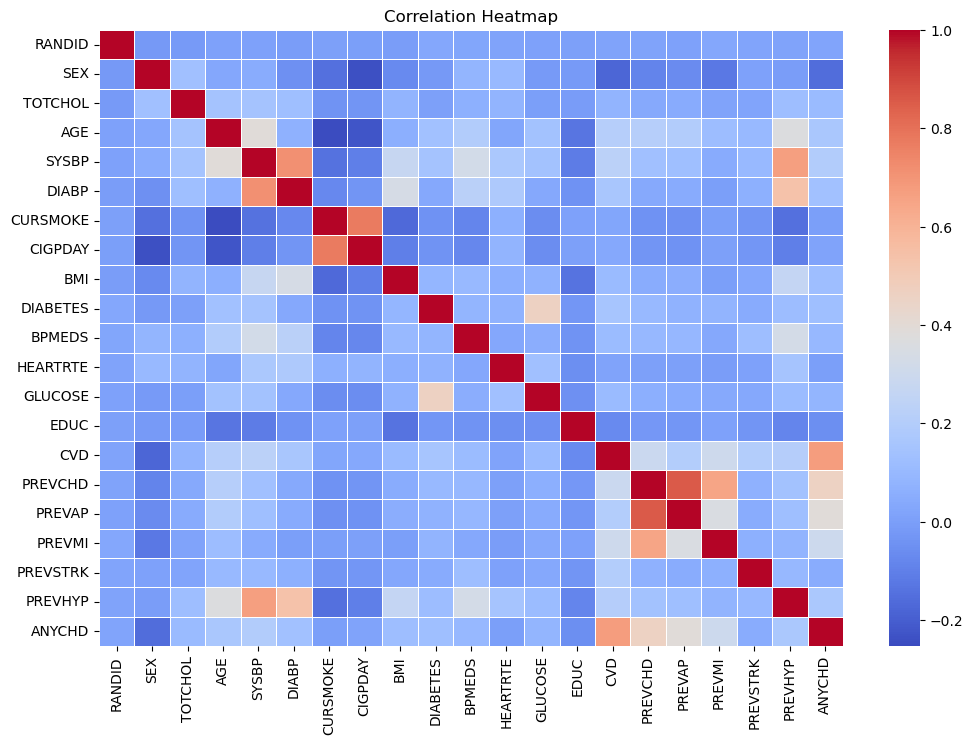

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_clean.select_dtypes(include=["float64", "int64"]).corr()
print(corr_matrix)
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


The heatmap shows the correlations between numerical features in the dataset:

    High positive correlation:

        SYSBP & DIABP (Systolic & Diastolic Blood Pressure) – expected as they are related.

        PREVHYP & SYSBP/DIABP – history of hypertension is strongly linked to blood pressure levels.

    Negative correlations:

        AGE & BPMEDS – Older individuals may be more likely to take blood pressure medication.

        CURSMOKE & AGE – Smoking prevalence might decrease with age in this dataset.

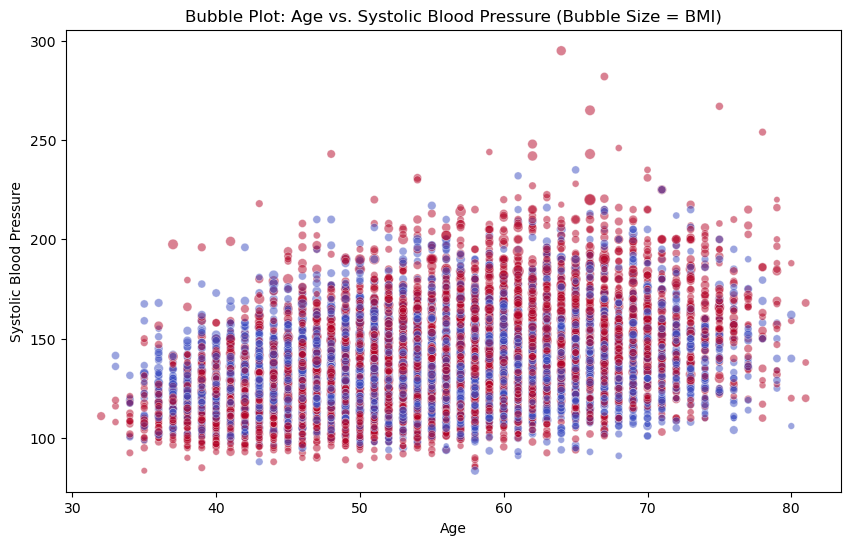

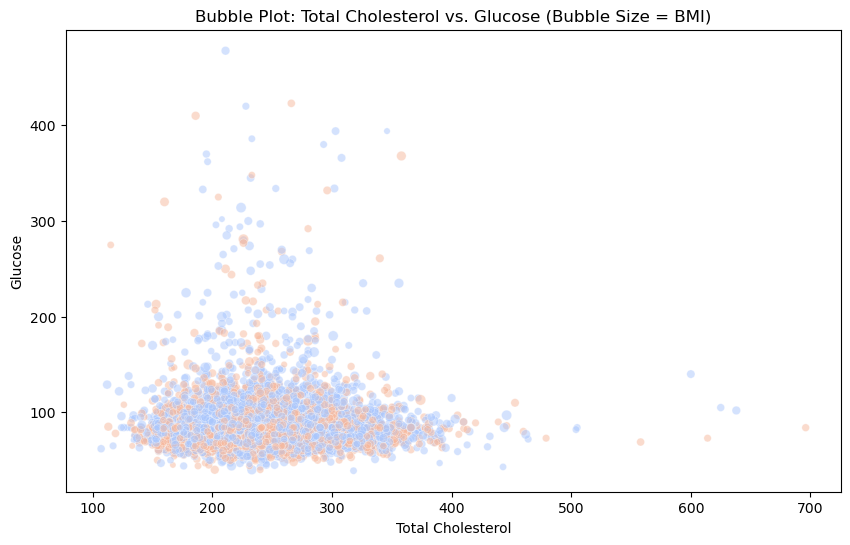

In [40]:
# Select key features for bubble plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="AGE", y="SYSBP",hue="SEX", size="BMI",alpha=0.5, palette="coolwarm", legend=False)
plt.title("Bubble Plot: Age vs. Systolic Blood Pressure (Bubble Size = BMI)")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="TOTCHOL", y="GLUCOSE", size="BMI", hue="CURSMOKE", alpha=0.5, palette="coolwarm", legend=False)
plt.title("Bubble Plot: Total Cholesterol vs. Glucose (Bubble Size = BMI)")
plt.xlabel("Total Cholesterol")
plt.ylabel("Glucose")
plt.show()


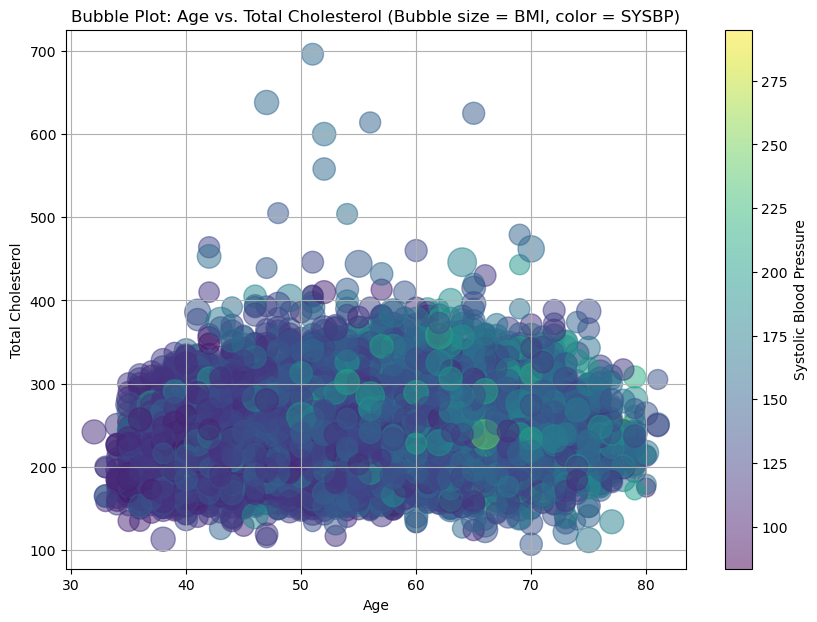

In [42]:
# Bubble plot example: AGE vs. TOTCHOL, bubble size representing BMI
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_clean['AGE'], df_clean['TOTCHOL'], s=df_clean['BMI']*10, alpha=0.5, c=df_clean['SYSBP'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.title('Bubble Plot: Age vs. Total Cholesterol (Bubble size = BMI, color = SYSBP)')
plt.colorbar(scatter, label='Systolic Blood Pressure')
plt.grid(True)
plt.show()


The bubble plots provide additional insights:

    Age vs. Systolic Blood Pressure:

        Older individuals tend to have higher systolic blood pressure.

        Higher BMI (larger bubbles) might be associated with increased blood pressure.

        Sex differences might be present, but further statistical tests would confirm this.

    Total Cholesterol vs. Glucose:

        There seems to be a positive correlation between total cholesterol and glucose levels.

        Smokers (hue = CURSMOKE) may have different cholesterol-glucose profiles compared to non-smokers.

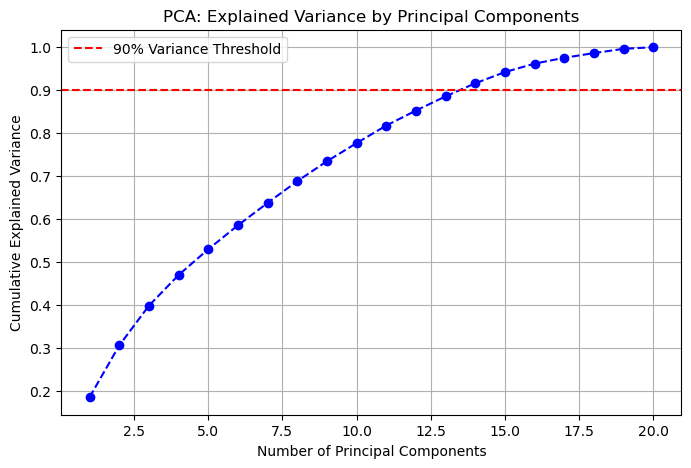

Variance captured by the first principal component: 0.18


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Select numerical columns and standardize the data
numeric_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns.difference(["RANDID"])
df_numeric = df_clean[numeric_cols]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance by Principal Components')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance Threshold")
plt.legend()
plt.grid()
plt.show()

# First principal component's variance capture
variance_pc1 = explained_variance[0]
print(f"Variance captured by the first principal component: {variance_pc1:.2f}")


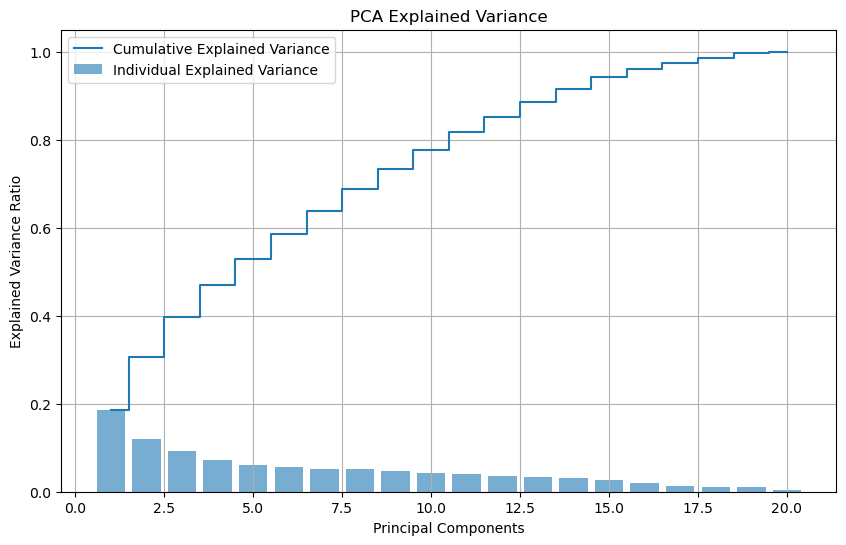

(0.1849914600744912, 0.1849914600744912)

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting numeric features for PCA, excluding non-informative identifiers or categorical columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).drop(columns=['RANDID'])

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratios
explained_variances = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variances)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variances) + 1), explained_variances, alpha=0.6, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Percentage of variance explained by the first principal component
explained_variances[0], cumulative_variance[0]



In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Example regression: Predicting Systolic Blood Pressure (SYSBP)
target_feature = 'SYSBP'
feature_sets = {
    'Demographics': ['AGE', 'SEX', 'EDUC'],
    'Clinical': ['TOTCHOL', 'BMI', 'DIABP'],
    'Lifestyle': ['CURSMOKE', 'CIGPDAY'],
    'Combined': ['AGE', 'SEX', 'BMI', 'TOTCHOL', 'DIABP', 'CURSMOKE', 'CIGPDAY']
}

regression_results = {}

for set_name, features in feature_sets.items():
    X = df_clean[features].dropna()
    y = df_clean.loc[X.index, target_feature]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    regression_results[set_name] = mse

# Display regression results
regression_results_df = pd.DataFrame.from_dict(regression_results, orient='index', columns=['Mean Squared Error'])
#import ace_tools as tools; tools.display_dataframe_to_user(name="Regression Results for SYSBP", dataframe=regression_results_df)

regression_results_df



,Mean Squared Error
Demographics,421.638833
Clinical,249.369917
Lifestyle,480.732288
Combined,191.895957


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

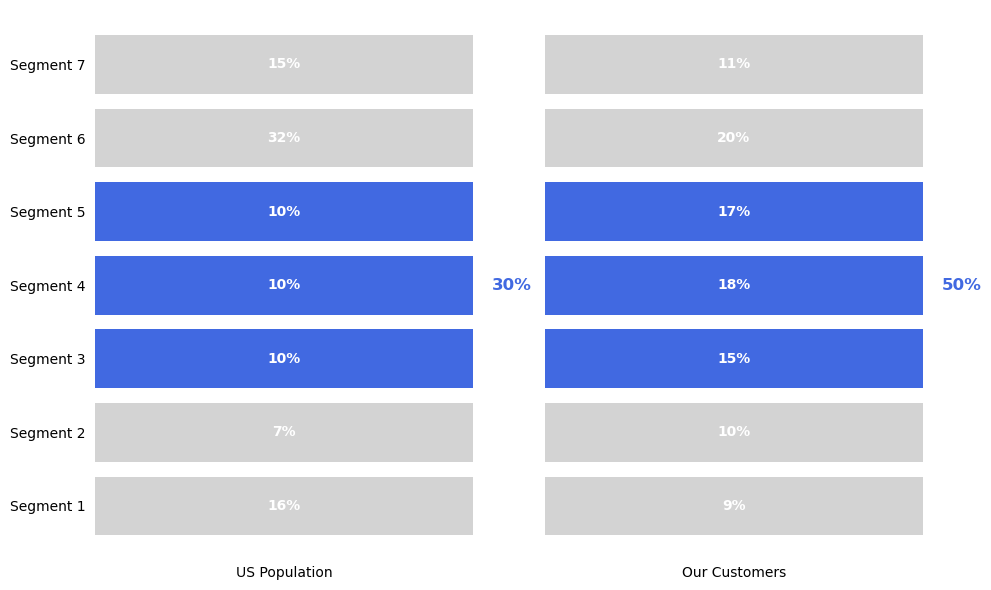

In [18]:


# Data
segments = ['Segment 7', 'Segment 6', 'Segment 5', 'Segment 4', 'Segment 3', 'Segment 2', 'Segment 1']
us_population = [15, 32, 10, 10, 10, 7, 16]
our_customers = [11, 20, 17, 18, 15, 10, 9]

highlight = 'royalblue'
grey = 'lightgrey'
colors_us = [grey, grey, highlight, highlight, highlight, grey, grey]
colors_customers = [grey, grey, highlight, highlight, highlight, grey, grey]

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))
bar_height = 0.8
indices = np.arange(len(segments))

# US Population
axes[0].barh(indices, [1]*len(segments), color=colors_us[::-1], height=bar_height)
axes[0].set_xlim(0, 1)
axes[0].set_xticks([])
axes[0].set_yticks(indices)
axes[0].set_yticklabels(segments[::-1])
axes[0].set_xlabel('US Population')
for i, v in enumerate(us_population[::-1]):
    axes[0].text(0.5, i, f'{v}%', va='center', ha='center', color='white', fontweight='bold')
axes[0].text(1.05, 3, '30%', va='center', ha='left', fontsize=12, fontweight='bold', color=highlight, transform=axes[0].get_yaxis_transform())

# Our Customers
axes[1].barh(indices, [1]*len(segments), color=colors_customers[::-1], height=bar_height)
axes[1].set_xlim(0, 1)
axes[1].set_xticks([])
axes[1].set_xlabel('Our Customers')
for i, v in enumerate(our_customers[::-1]):
    axes[1].text(0.5, i, f'{v}%', va='center', ha='center', color='white', fontweight='bold')
axes[1].text(1.05, 3, '50%', va='center', ha='left', fontsize=12, fontweight='bold', color=highlight, transform=axes[1].get_yaxis_transform())

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()